In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import svm, metrics, datasets
from sklearn.metrics import confusion_matrix, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2

In [5]:
train_path = r"C:\Users\BlackFlameSG\Documents\Python Scripts\ML\Project\ANN_Image\gender_eye\data\train"
test_path = r"C:\Users\BlackFlameSG\Documents\Python Scripts\ML\Project\ANN_Image\gender_eye\data\test"

In [110]:
#this generator is like an image filter which first normalizes the data by dividing each element by 255 so it's in the range 0-1
#second it splits the data into 20% validation and 80% training
training_generator = ImageDataGenerator(rescale=1./255,
                                        validation_split=0.1)
#now we load the training data from our directory
training_dataset = training_generator.flow_from_directory(train_path,
                                                        target_size = (32, 32),
                                                        batch_size = 64,
                                                        subset = 'training',
                                                        color_mode="grayscale",
                                                        interpolation="bicubic",
                                                        class_mode='binary',
                                                        shuffle = True)
#here we load the validation data
validation_dataset = training_generator.flow_from_directory(train_path,
                                                        target_size = (32, 32),
                                                        batch_size = 64,
                                                        subset = 'validation',
                                                        color_mode="grayscale",
                                                        interpolation="bicubic",
                                                        class_mode = 'binary',
                                                        shuffle = True)


Found 8298 images belonging to 2 classes.
Found 921 images belonging to 2 classes.


In [111]:
#it prints the classes
training_dataset.class_indices

{'femaleeyes': 0, 'maleeyes': 1}

In [112]:
#the generator for the test
test_generator = ImageDataGenerator(rescale=1./255)
#we load the test data
test_dataset = test_generator.flow_from_directory(test_path,
                                                target_size = (32, 32),
                                                batch_size = 1,
                                                color_mode="grayscale",
                                                class_mode = 'binary',
                                                shuffle = False)

Found 2306 images belonging to 2 classes.


In [121]:
#the model starts here sequential is the standard for ANN
model = Sequential()

model.add(Flatten(input_shape=(32,32,1)))
model.add(Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [122]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 1024)              0         
                                                                 
 dense_57 (Dense)            (None, 64)                65600     
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_58 (Dense)            (None, 128)               8320      
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_59 (Dense)            (None, 64)                8256      
                                                                 
 dense_60 (Dense)            (None, 1)               

In [123]:
#this here is the optimizer we choose SGD with is gradient descent with momentum which is a better model
opti = tf.keras.optimizers.SGD(learning_rate=0.003,momentum = 0.5)
#here we compile the model and binary cross entropy is our chosen loss function and it's the best loss function for binary classification
model.compile(optimizer=opti, loss='binary_crossentropy', metrics = ['accuracy'])

In [124]:
#checkpoint to hold the best weights found yet
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="weights.h5", verbose=1, save_best_only=True)
#here we train the model
historic = model.fit(training_dataset, validation_data = validation_dataset, epochs=50, verbose=1, callbacks=[checkpoint])

Epoch 1/50
129/130 [============================>.] - ETA: 0s - loss: 0.9786 - accuracy: 0.5555
Epoch 00001: val_loss improved from inf to 0.95738, saving model to weights.h5
130/130 [==============================] - 7s 49ms/step - loss: 0.9785 - accuracy: 0.5560 - val_loss: 0.9574 - val_accuracy: 0.6460
Epoch 2/50
130/130 [==============================] - ETA: 0s - loss: 0.9592 - accuracy: 0.5927
Epoch 00002: val_loss improved from 0.95738 to 0.94067, saving model to weights.h5
130/130 [==============================] - 6s 48ms/step - loss: 0.9592 - accuracy: 0.5927 - val_loss: 0.9407 - val_accuracy: 0.6786
Epoch 3/50
129/130 [============================>.] - ETA: 0s - loss: 0.9391 - accuracy: 0.6293
Epoch 00003: val_loss improved from 0.94067 to 0.90962, saving model to weights.h5
130/130 [==============================] - 6s 48ms/step - loss: 0.9388 - accuracy: 0.6295 - val_loss: 0.9096 - val_accuracy: 0.7177
Epoch 4/50
129/130 [============================>.] - ETA: 0s - loss: 0

Epoch 28/50
129/130 [============================>.] - ETA: 0s - loss: 0.6790 - accuracy: 0.8227
Epoch 00028: val_loss improved from 0.65143 to 0.64508, saving model to weights.h5
130/130 [==============================] - 6s 48ms/step - loss: 0.6786 - accuracy: 0.8231 - val_loss: 0.6451 - val_accuracy: 0.8404
Epoch 29/50
129/130 [============================>.] - ETA: 0s - loss: 0.6733 - accuracy: 0.8278
Epoch 00029: val_loss improved from 0.64508 to 0.64400, saving model to weights.h5
130/130 [==============================] - 6s 48ms/step - loss: 0.6734 - accuracy: 0.8279 - val_loss: 0.6440 - val_accuracy: 0.8458
Epoch 30/50
129/130 [============================>.] - ETA: 0s - loss: 0.6765 - accuracy: 0.8235
Epoch 00030: val_loss improved from 0.64400 to 0.63888, saving model to weights.h5
130/130 [==============================] - 6s 48ms/step - loss: 0.6758 - accuracy: 0.8238 - val_loss: 0.6389 - val_accuracy: 0.8415
Epoch 31/50
130/130 [==============================] - ETA: 0s -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


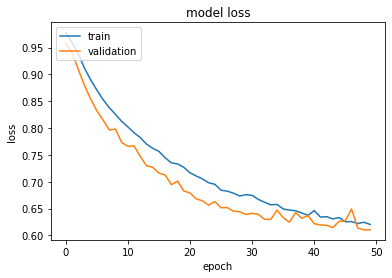

In [127]:
print(historic.history.keys())
plt.plot(historic.history['loss'])
plt.plot(historic.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


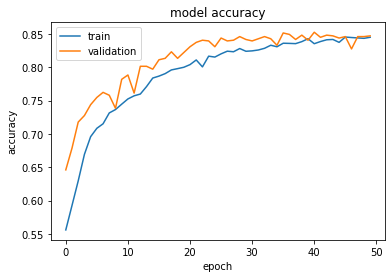

In [128]:
print(historic.history.keys())
plt.plot(historic.history['accuracy'])
plt.plot(historic.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [81]:
test_dataset.reset()
X_test, y_test = next(test_dataset)
for i in range(len(test_dataset)-1): #1st batch is already fetched before the for loop.
  img, label = next(test_dataset)
  X_test = np.append(X_test, img, axis=0 )
  y_test = np.append(y_test, label, axis=0)
print(X_test.shape, y_test.shape)

(2306, 32, 32, 1) (2306,)


In [63]:
len(X_test)

2306

In [129]:
# Model Recall: what percentage of positive tuples are labelled as such?
y_pred = np.around(model.predict(X_test))

recall_average = recall_score(y_test,y_pred, average="micro")

print("Recall:",recall_average)

Recall: 0.8534258456201215


In [130]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[ 827,  214],
       [ 124, 1141]], dtype=int64)

<AxesSubplot:>

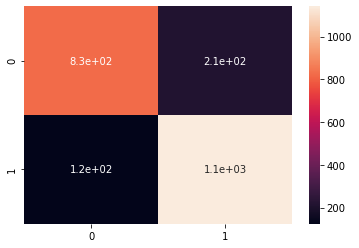

In [131]:
sns.heatmap(conf_matrix, annot=True)

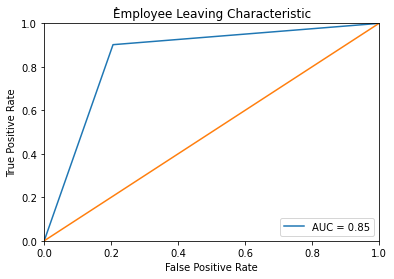

In [132]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred) #fpr = False Positive Rate, tpr = True Positive Rate
roc_auc = metrics.auc(fpr, tpr)

plt.title('ُEmployee Leaving Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()